In [53]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas
import warnings
from kneed import KneeLocator

In [54]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [55]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [56]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
#initiate scaler class
scaler = StandardScaler()

#Transform data
market_data_scaled = scaler.fit_transform(market_data_df)


In [57]:
# Create a DataFrame with the scaled data
market_data  = pd.DataFrame(market_data_scaled,\
                            columns = market_data_df.columns,\
                            index = market_data_df.index)
# Display sample data
market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [58]:
warnings.filterwarnings(action='ignore')

# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,11))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k,n_init='auto',random_state=42)
# 2. Fit the model to the data using the scaled DataFrame
    model.fit(market_data)
    #preds = model.fit(market_data)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

#Evaluate percentage difference. 
percent_diff = [100 * (inertia_values[i-1] - inertia_values[i]) / inertia_values[i-1] for i in range(1, len(inertia_values))]
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = pd.DataFrame({'K':k_values,'inertia':inertia_values})
# Display the DataFrame
elbow_data

,K,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


The optimal K value is 4


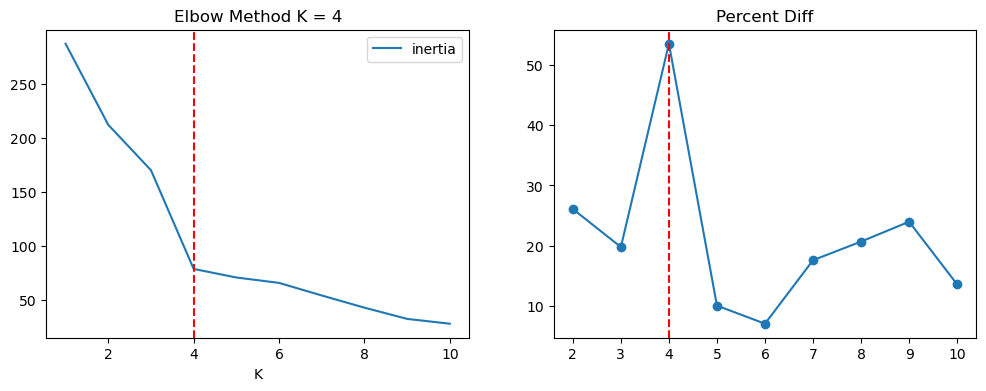

In [59]:
#Use kneeLocator to find elbow point
k1 = KneeLocator(range(1, len(inertia_values) +1),inertia_values,curve= 'convex',direction='decreasing')
print(f"The optimal K value is {k1.elbow}")

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
elbow_data.plot(x = 'K',y = 'inertia', title = f'Elbow Method K = {k1.elbow}', ax = axs[0])
axs[0].axvline(x=k1.elbow, color='red', linestyle='--')
axs[1].plot(k_values[1:], percent_diff, marker='o')
axs[1].axvline(x=k1.elbow, color='red', linestyle='--', label='Vertical Line at x=3')
axs[1].set_title('Percent Diff')
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** At K = 4 is optimal K value

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [60]:
# Initialize the K-Means model using the best value for k
model2 = KMeans(n_clusters=k1.elbow,n_init='auto',random_state=42)

In [61]:
warnings.filterwarnings(action='ignore')
# Fit the K-Means model using the scaled data
model2.fit(market_data)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [62]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds2 = model2.predict(market_data)

# View the resulting array of cluster values.
preds2

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [63]:
# Create a copy of the DataFrame
market_data_copy  = market_data.copy()


In [64]:
# Add a new column to the DataFrame with the predicted clusters

market_data['target'] = preds2
# Display sample data


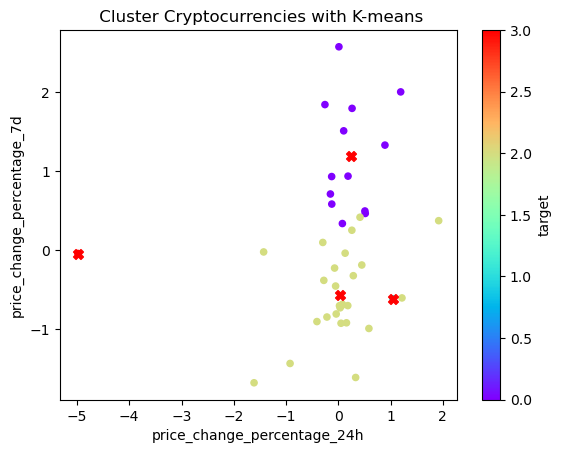

In [65]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data.plot.scatter(x="price_change_percentage_24h",\
                         y="price_change_percentage_7d",\
                            c = 'target',colormap='rainbow',\
                                title = ' Cluster Cryptocurrencies with K-means')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=50, c='red', marker='X', label='Centroids')


### Optimize Clusters with Principal Component Analysis.

In [66]:
# Create a PCA model instance and set `n_components=3`.
n_component = 3
pca = PCA(n_components=n_component)

In [67]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_copy)

# View the first five rows of the DataFrame. 
pd.DataFrame(market_data_pca).head()

,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [68]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
display(explained_variance)
display(explained_variance.sum())

array([0.3719856 , 0.34700813, 0.17603793])

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  0.8844

In [69]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
# Creating a DataFrame with the PCA data
market_data_pca = pd.DataFrame(market_data_pca, columns=['PCA1','PCA2','PCA3'], 
                               # Set the coinid column as index
                               index = market_data.index)

# Display sample data
market_data_pca.head(5)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [70]:
warnings.filterwarnings(action='ignore')
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_value_pca = list(range(1,11))

# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
for k in k_value_pca:
# 2. Fit the model to the data using PCA DataFrame.
    model_pca = KMeans(n_clusters=k,n_init='auto',random_state=42)
    model_pca.fit(market_data_pca)
    #preds_pca = model_pca.predict(market_data_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(model_pca.inertia_)
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_data_pca = pd.DataFrame({'k':k_value_pca,'inertia_pca':inertia_pca})


#Evaluate percentage difference. 
percent_diff_pca = [100 * (inertia_pca[i-1] - inertia_pca[i]) / inertia_pca[i-1] for i in range(1, len(inertia_pca))]
# Display the DataFrame
print('Elbow method data')
print(elbow_data_pca.head())

Elbow method data
   k  inertia_pca
0  1   256.874086
1  2   182.339530
2  3   140.431833
3  4    49.665497
4  5    42.051901


The optimal K value is 4


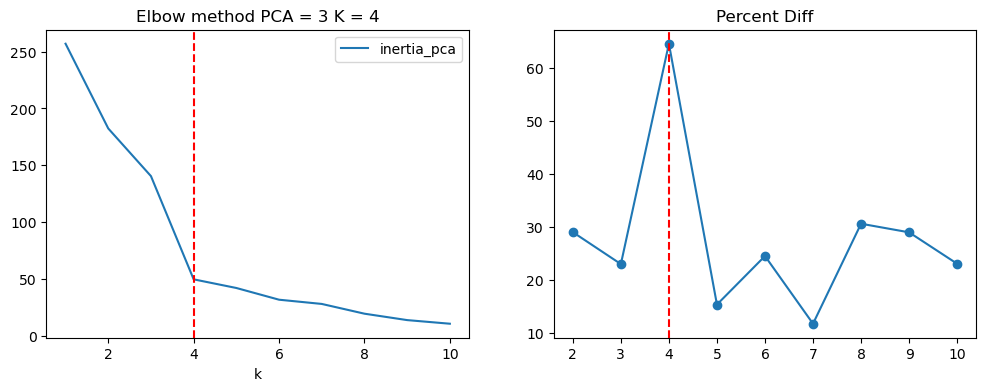

In [71]:
#Use kneeLocator to find elbow point
k2 = KneeLocator(range(1, len(inertia_values) +1),inertia_pca,curve= 'convex',direction='decreasing')
print(f"The optimal K value is {k2.elbow}")

# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
elbow_data_pca.plot(x = 'k',y = 'inertia_pca', title = f'Elbow method PCA = 3 K = {k2.elbow}', ax = axs[0])
axs[0].axvline(x=k2.elbow, color='red', linestyle='--')
axs[1].plot(k_value_pca[1:], percent_diff_pca, marker='o')
axs[1].axvline(x=k2.elbow, color='red', linestyle='--')
axs[1].set_title('Percent Diff')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  K = 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Both look similar at K = 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [72]:
# Initialize the K-Means model using the best value for k
model_pca_2 =KMeans(n_clusters=k2.elbow,n_init='auto',random_state=42) 

In [73]:
# Fit the K-Means model using the PCA data
warnings.filterwarnings(action='ignore')
model_pca_2.fit(market_data_pca)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [74]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pred_pca_2 = model_pca_2.predict(market_data_pca)

# Print the resulting array of cluster values.
pred_pca_2

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [75]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_copy = market_data_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca['target'] = pred_pca_2

# Display sample data
market_data_pca.head()

,PCA1,PCA2,PCA3,target
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [76]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
# Visualize the clusters using hvplot.scatter
market_data_pca.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    by='target',  # Color points by cluster
    cmap='Category10',  # Use a categorical color map
    title='K-Means Clustering',
)


:NdOverlay   [target]
   :Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [77]:
# Use the columns from the original scaled DataFrame as the index.
weights_df = pd.DataFrame(pca.components_, columns=market_data_copy.columns)

In [78]:
#Which features have the strongest positive or negative influence on each component?
sorted_weight = []
for i in range(n_component):
    component_weights = weights_df.iloc[i]
    sorted_weights = component_weights.abs().sort_values(ascending=False)
    print(f'Top 3 features have the strongest positive or negative influence for PCA{i+ 1}')
    print('-'*100)
    print(sorted_weights[0:3])
    print('\n')

Top 3 features have the strongest positive or negative influence for PCA1
----------------------------------------------------------------------------------------------------
price_change_percentage_200d    0.594468
price_change_percentage_1y      0.568379
price_change_percentage_24h     0.416728
Name: 0, dtype: float64


Top 3 features have the strongest positive or negative influence for PCA2
----------------------------------------------------------------------------------------------------
price_change_percentage_30d    0.562182
price_change_percentage_14d    0.540415
price_change_percentage_60d    0.434040
Name: 1, dtype: float64


Top 3 features have the strongest positive or negative influence for PCA3
----------------------------------------------------------------------------------------------------
price_change_percentage_7d     0.787670
price_change_percentage_60d    0.361377
price_change_percentage_14d    0.349534
Name: 2, dtype: float64




#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
* Top 3 features have the strongest positive or negative influence for PCA1
* ----------------------------------------------------------------------------------------------------
* price_change_percentage_200d    0.594468
* price_change_percentage_1y      0.568379
* price_change_percentage_24h     0.416728


* Top 3 features have the strongest positive or negative influence for PCA2
* ----------------------------------------------------------------------------------------------------
* price_change_percentage_30d    0.562182
* price_change_percentage_14d    0.540415
* price_change_percentage_60d    0.434040


*  3 features have the strongest positive or negative influence for PCA3
* ----------------------------------------------------------------------------------------------------
* price_change_percentage_7d     0.787670
* price_change_percentage_60d    0.361377
* price_change_percentage_14d    0.349534

    